# MATHS7027 Mathematical Foundations of Data Science
## Computer Exercise 3
In this computer exercise, we are going to investigate two discrete probability distributions, which we saw in week 4 - the Binomial distribution and the Poisson distribution.
## Part 1: Plotting Histograms of Data
First, let's generate some random data to work with. We'll use the `random` package to help with this. We'll create a list of 30 random integers between 0 and 20.

Note that `range(n)` produces the numbers from 0 to n-1, so `range(30)` gives us 30 numbers to iterate over. We don't really care what these numbers are because we are counting using `i` as the input; the numbers are just to keep track of our counting.

In [1]:
import random
r1 = [random.randint(0,20) for i in range(30)]
r1

[20,
 12,
 7,
 8,
 15,
 13,
 9,
 3,
 18,
 2,
 19,
 0,
 9,
 0,
 9,
 0,
 1,
 9,
 5,
 19,
 18,
 18,
 16,
 3,
 14,
 17,
 9,
 9,
 20,
 18]

Depending on your particular output, you might wonder if specifying `(0,20)` in the random number generation really gives numbers up to 20, or only up to 19. Can you think of a simple way to check this? You should find that it does include both endpoints (i.e., 0 and 20).

Next, we will make a histogram. Before we use the random numbers we just generated, let's use some not-so-random numbers. This will make it easier to understand some potential issues with histograms.

(array([6., 0., 2., 2., 2., 1., 0., 1., 2., 4.]),
 array([ 4. ,  5.4,  6.8,  8.2,  9.6, 11. , 12.4, 13.8, 15.2, 16.6, 18. ]),
 <BarContainer object of 10 artists>)

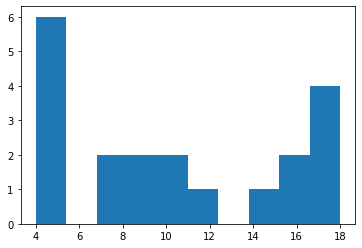

In [2]:
r2 = [4,4,5,5,5,5,7,8,9,9,10,10,11,15,16,16,18,18,18,18]

import matplotlib.pyplot as plt
plt.hist(r2)

Can you identify two separate problems with the above histogram?

<details> 
    <summary markdown="span"><strong>Click here</strong> to reveal:</summary>
    
1. It doesn't show all of the possible data. We are viewing a random sample of numbers between 0 and 20, but we might still want to show the full range of possible values.
2. The numbers 4 and 5 are in the same bin. In fact, if you look at the output that Python gives just above the plot, the second array shows the bins. We can see that one goes from `4.` to `5.4`, but this doesn't necessarily make a lot of sense, since we specifically generated random *integers*.
</details>

Let's try to make a better histogram. Take a look at the [documentation for pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to see what parameters are available. In particular, we might be interested in `bins`, `range`, and `align`. If you want to set a parameter, you must include it as an argument in your `hist` command, e.g., `bins=20` would specify 20 bins.

Try writing your own code in the cell below to improve our histogram.

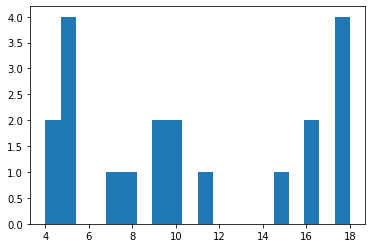

In [8]:
# Try some code here to fix these problems
plt.hist(r2, bins= 20)
plt.show()

There are some further tricks we can use to make our histogram even better. We can use `plt.xticks` to set labels on the x-axis, and use `align` to centre the bins over integers - we do `align="left"`, because the bins are of the form $[0,1)$, $[1,2)$, and so on. We specify the range up to 22 in order to include the bin $[20,21)$ (remember, `range` does not include the last number, so `range(22)` gives 0 up to 21).

Note that specifying a range of bins, rather than the number of bins, defines the start of each bin at an integer.

Don't worry if you didn't know all of this already! The idea is to try it, see how it looks, and then adjust the parameters so you can deal with problems when you encounter them.

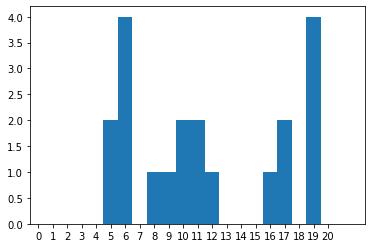

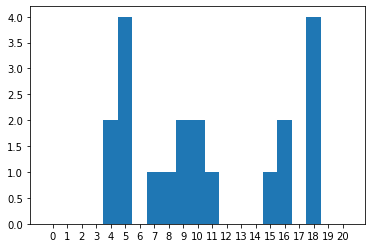

In [13]:
plt.xticks(range(21))
plt.hist(r2,bins=range(22),align="right")
plt.show()
plt.xticks(range(21))
plt.hist(r2,bins=range(22),align="left")
plt.show()

Now, let's try something similar with your random data, `r1 `:

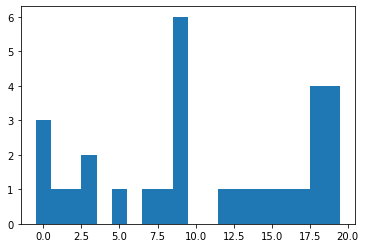

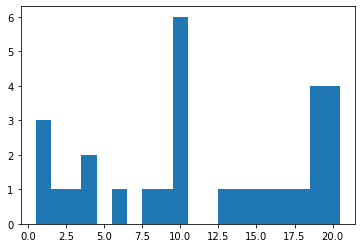

In [15]:
# Try some code here to produce a histogram using your random data (r1)

plt.hist(r1,bins=20,align="left")
plt.show()


plt.hist(r1,bins=20,align="right")
plt.show()

Now, let's try it with a lot more data - say, 1000 numbers instead of 30 - and plot the corresponding histogram. Can you guess what the histogram should look like before plotting it?

In [229]:
r3 = [random.randint(0,30) for i in range(1000000)]
count30,count29 = 0,0
for i in r3:
    if i == 30:
        count30+=1 
    if i == 29:
        count29+=1 
print(count29,count30)

32380 32279


(array([32403., 32140., 32324., 32395., 32188., 32460., 32085., 32313.,
        32294., 32035., 32401., 31859., 32179., 32202., 31984., 31970.,
        32479., 32273., 32414., 32176., 32373., 32546., 32311., 32283.,
        32251., 32407., 32193., 32143., 32260., 32380., 32279.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <BarContainer object of 31 artists>)

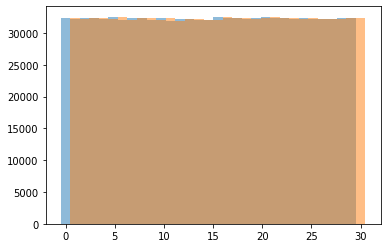

In [230]:
plt.hist(r3, bins = 31,align="left",alpha = 0.5)
plt.hist(r3, bins = 31,align="right",alpha =0.5)

This histogram should look fairly flat - this is because we are randomly selecting each number with equal probability (this is called a [Uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)). We can also generate random data using other discrete distributions.

## Part 2: The Binomial Distribution - Experimenting with Data 
Now, let's generate some random data using the Binomial distribution. We can access probability distributions using the `stats` package in `scipy`. 

In [88]:
from scipy import stats

bn1 = stats.binom.rvs(n=5,p=0.5,size=20)
bn1

array([2, 2, 1, 1, 3, 2, 3, 1, 3, 2, 4, 0, 1, 2, 2, 1, 3, 3, 3, 1])

Can you interpret what this data represents? Try changing the parameters in the definition to explore what happens to the data. 

<details> 
    <summary markdown="span"><strong>Click here</strong> to reveal:</summary>
    Each entry in the list is the number of successes in a series of <code>n=5</code> random trials, where each trial has a <code>p=0.5</code> probability of success. There are <code>size=20</code> numbers in the list.
</details>

Now, let's plot a histogram of this data. I'll redefine `bn1` in the code block below, in case you changed it above when you were exploring what each parameter means:

array([2, 2, 3, 2, 1, 3, 3, 2, 1, 3])

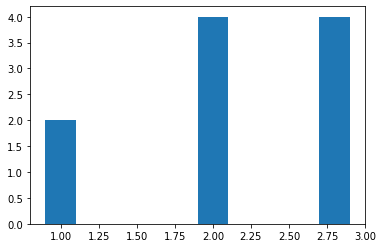

In [148]:
bn1 = stats.binom.rvs(n=5,p=0.5,size=10)

# Try some code to produce a histogram of bn1
plt.hist(bn1, align="left")
bn1

Once you have some nice code to produce a histogram, you can re-run it see different random data.

Now, change your code to generate much more data. This time, let's have 20 trials and 1000 numbers; call this `bn2`.

(array([ 10.,  16.,  39., 177., 160., 193., 293.,  66.,  25.,  21.]),
 array([ 3. ,  4.3,  5.6,  6.9,  8.2,  9.5, 10.8, 12.1, 13.4, 14.7, 16. ]),
 <BarContainer object of 10 artists>)

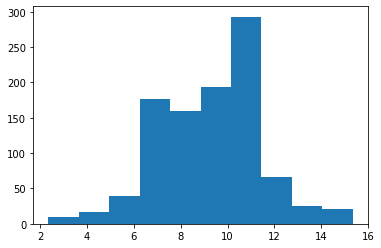

In [184]:
# Define bn2 here

bn2 = stats.binom.rvs(n=20,p=0.5,size=1000)

# Try some code to produce a histogram of bn1
plt.hist(bn2, align="left")


We should see that the shape is very different to the distribution we had for the uniform random data in part 1.

Now, try changing the probability of success and look at the result. 

(array([  9.,  56., 141., 222., 209., 170., 110.,  54.,  22.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

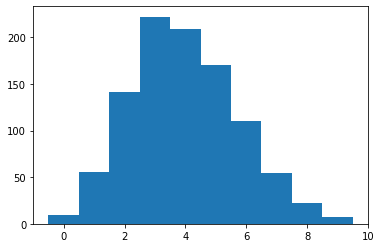

In [202]:
# Try a probability lower than 0.5; call it bn3

bn3 = stats.binom.rvs(n=20,p=0.2,size=1000)

# Try some code to produce a histogram of bn1
plt.hist(bn3, align="left")


(array([  2.,   3.,   9.,  18.,  46., 270., 211., 226., 146.,  69.]),
 array([ 8. ,  9.2, 10.4, 11.6, 12.8, 14. , 15.2, 16.4, 17.6, 18.8, 20. ]),
 <BarContainer object of 10 artists>)

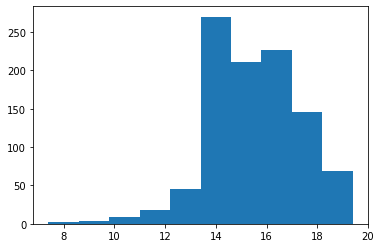

In [208]:
# Try a probability higher than 0.5; call it bn4 

bn4 = stats.binom.rvs(n=20,p=0.8,size=1000)

# Try some code to produce a histogram of bn1
plt.hist(bn4, align="left")


We can also calculate the mean and variance of our data. These are methods associated with the random variable; for example, for `bn1` we can call `bn1.mean()` and `bn1.var()`.

Try calculating the mean and variance of all of the Binomial random variable samples we have generated so far.

In [209]:
# Here's an example of the mean and variance for bn1
print("The mean of bn1 is:",bn1.mean())
print("The variance of bn1 is:",bn1.var())

# Try calculating the mean and variance for each of bn2, bn3, and bn4



The mean of bn1 is: 2.2
The variance of bn1 is: 0.5599999999999999


The theoretical (population) mean for the Binomial distribution is $n \times p$, but, for a given random sample, it won't be exactly that. As we increase the amount of data we are looking at (sample size), we expect that the mean of our data (sample mean) will approach the population mean.

Now, let's carry out some experiments in order to observe this. We will generate a series of data sets and compute the mean for each, and look at what happens as the size of the data sets increases. We can plot this data alongside the population mean. 

Explore what happens if you choose different values of `n`, `p`, and `size`.

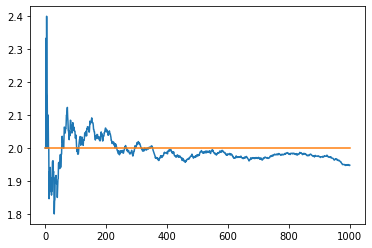

In [210]:
import numpy as np
# here, we define the parameters we need: n is the number of trials, p is the
# probability of success, and size is the sample size
n = 5
p = 0.4
size = 1000

# generate the random data we want to use
D = stats.binom.rvs(n=n,p=p,size=size)

# initialise a list that we can use to store the means
M = []

# and another list that we can use to store the population mean (there are many
# smarter ways to do this, but this will be fine for what we need)
pm = []

# using a for loop, calculate the sample mean of the first i observations in our
# data also keep track of the population mean
for i in range(1,size+1):
    M.append(np.mean(D[0:i]))
    pm.append(n*p)

# get sensible numbers for the x-axis of our plot
x = np.arange(size)+1
# produce a plot of x vs M (the sample means we calculated)
plt.plot(x,M)
# produce a plot of x vs pm (the population mean of our distribution)
plt.plot(x,pm)
# display the plots
plt.show()

#### Extension question:
What if you modify the code above to produce an entirely new sample of size `i` at each step? How would you expect the plot to change?

*Note: This will probably run a fair bit slower than the original code, so be careful about not making `size` too large.*

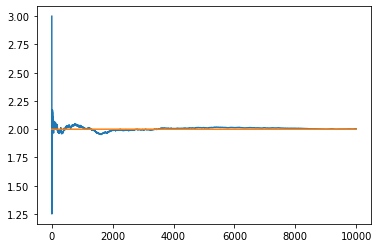

In [211]:
# Try the extension question here if you want to

n = 5
p = 0.4
size = 10000

# generate the random data we want to use
D = stats.binom.rvs(n=n,p=p,size=size)

# initialise a list that we can use to store the means
M = []

# and another list that we can use to store the population mean (there are many
# smarter ways to do this, but this will be fine for what we need)
pm = []

# using a for loop, calculate the sample mean of the first i observations in our
# data also keep track of the population mean
for i in range(1,size+1):
    M.append(np.mean(D[0:i]))
    pm.append(n*p)

# get sensible numbers for the x-axis of our plot
x = np.arange(size)+1
# produce a plot of x vs M (the sample means we calculated)
plt.plot(x,M)
# produce a plot of x vs pm (the population mean of our distribution)
plt.plot(x,pm)
# display the plots
plt.show()

Now, do the same analysis for the variance. Again, observe what happens to the sample variance as you change `n`, `p`, and `size`. What value should the sample variance approach as the sample size increases?

*Note: you don't need to worry about reproducing the extension question for the variance.*

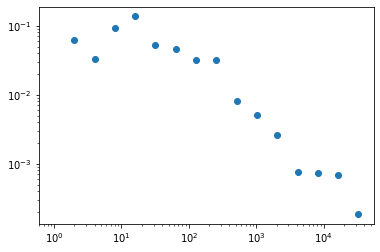

In [243]:
n = 5
p = 0.4
X = []
y = []
for size in range(0,16):
    
    size = 2**size

    # generate the random data we want to use
    D = stats.binom.rvs(n=n,p=p,size=size)

    # initialise a list that we can use to store the means
    M = []

    # and another list that we can use to store the population mean (there are many
    # smarter ways to do this, but this will be fine for what we need)
    pm = []

    # using a for loop, calculate the sample mean of the first i observations in our
    # data also keep track of the population mean
    for i in range(1,size+1):
        M.append(np.mean(D[0:i]))
        pm.append(n*p)

    X.append(size)
    y.append(np.array(M).var())

plt.scatter(X, y)
plt.xscale("log")
plt.yscale("log")
plt.show()

## Part 3: Binomial Distribution Calculations 
So far, we have been working with random data generated using a Binomial distribution. Now, we will work with the actual distribution and see how to calculate probabilities for Binomial random variables.

In [244]:
# first we will set n and p 
n = 5
p = 0.5

# now we define a binomial random variable 
# by default it expects n and p first, so we enter those as arguments 
X = stats.binom(n=n,p=p)

# now we can work out probabilities using the probability mass function
# (PMF) and cumulative distribution function (CDF) 
print("An example of the PMF is X.pmf(2)=",X.pmf(2))
print("An example of the CDF is X.cdf(2)=",X.cdf(2))

An example of the PMF is X.pmf(2)= 0.31249999999999983
An example of the CDF is X.cdf(2)= 0.5


Can you see what these are calculating? Try a few more values to investigate.

In [247]:
# Try more examples here to see if you can figure out what the pmf and cdf are

print("An example of the PMF is X.pmf(1)=",X.pmf(1))
print("An example of the CDF is X.cdf(3)=",X.cdf(3))

An example of the PMF is X.pmf(1)= 0.15624999999999997
An example of the CDF is X.cdf(3)= 0.8125


We can also plot the PMF and CDF.

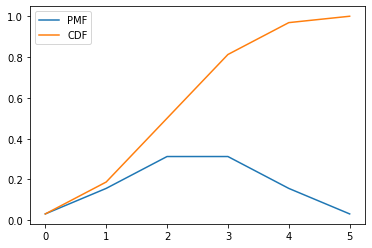

In [248]:
# first we make a range of x values 
x = range(n+1)

# then we make the plots (here they are shown on the same set of axes)
plt.plot(x,X.pmf(x),label="PMF")
plt.plot(x,X.cdf(x),label="CDF")
plt.legend()
plt.show()

We can use the PMF and CDF to calculate probabilities.

Suppose a fair coin is tossed 5 times (this has a Binomial distribution with $n = 5$ and $p = 0.5$, so we can use the `X` we have already defined).

What is the probability of getting:  
(a) exactly 1 head?  
(b) at most 2 heads?

In [249]:
# What is the probability of getting exactly 1 head?
print(X.pmf(1))


# What is the probability of getting at most 2 heads?
print(X.pmf(1)+ X.pmf(2))


0.15624999999999997
0.4687499999999998


Now, suppose a biased coin is tossed $n = 1000$ times. The biased coin has a probability $p = 0.4$ of coming up heads.

Find the probability that there are:  
(a) at most 425 heads.  
(b)  at least 395 heads.  
(c) between 395 and 425 heads (inclusive).

In [250]:
n = 1000
p = 0.4

# now we define a binomial random variable 
# by default it expects n and p first, so we enter those as arguments 
X = stats.binom(n=n,p=p)

# Probability of at most 425 heads

print(X.cdf(425))

# Probability of at least 395 heads

print(1-X.cdf(394))

# Probability of between 395 and 425 heads (inclusive)

print(X.cdf(425)-X.cdf(395))

0.9497684283389287
0.6379988539152479
0.5632784995352522


Finally, let's try plotting the PMF and CDF for large $n$ and various choices of $p$.  You should find that it looks like a smooth line. The shape might also look familiar - for certain parameters, the Binomial distribution is approximated by the Normal distribution. We'll come back to this later in the course when we look at continuous probability distributions.

*Hint: for larger values of `n`, it's best to plot the PMF and CDF separately.*

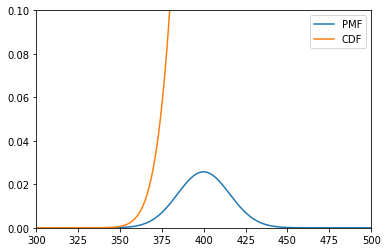

In [254]:
# Try plotting the pmf and cdf separately, for large values of n (say n = 100, 1000)

x = range(1000)

# then we make the plots (here they are shown on the same set of axes)
plt.plot(x,X.pmf(x),label="PMF")
plt.plot(x,X.cdf(x),label="CDF")
plt.xlim(300,500)
plt.ylim(0,0.1)
plt.legend()
plt.show()

## Extension: The Poisson Distribution 
Have you finished Parts 1, 2, and 3, but there's still time left in your class? That's great - that means we have time to look at *another* distribution!

`scipy.stats` has many discrete probability distributions. Another, which we have seen in the course material, is the Poisson distribution. You can try exploring the Poisson distribution in a similar way to what we have done previously with the Binomial distribution.

For a summary of the Poisson distribution in `scipy.stats`, see here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

Since this is an extension exercise, and not a guided activity, there's just one code block below, but you can use it to explore the Poisson distribution in whatever way you like. Let's see what you can come up with!